<a href="https://colab.research.google.com/github/kangmg/image2music/blob/main/demo_web/MOODSic_localtunnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

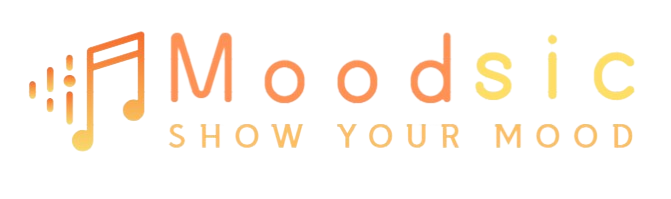



<font face="Rage" size=7 color='#F4A460'>Mood<font><font face="Rage" size=7 color='#F0E68C'>sic<font>

<font face="Rage" size=6>Streamlit Demo Server<font>

> 노트북 소개

- localtunnel을 이용하여 Moodsic의 streamlit 서비스 페이지를 colab 상에서 실행하는 노트북입니다.

> 코드 셀 설명

| 색상 | 역할 |
|:-:|:-:|
|<font face="Rage" color='#DA70D6'>자홍색<font>| 노트북 셋업 |
|<font face="Rage" color='#32CD32'>연두색<font>| 모듈 작성 |
|<font face="Rage" color='#87CEFA'>하늘색<font>| Streamlit 페이지 |

---

In [1]:
#@title <font face="Rage" size=5 color='#DA70D6'>Setup<font>
#@markdown Runtime ~2 min

from IPython.display import clear_output

# streamlit setup
!pip install -q streamlit==1.35.0 # 6 월 21일 1.36 버전 릴리스 --> 오류 발생
!npm install localtunnel
!pip install -q st_pages==0.4.5

!mkdir streamlit
!mkdir media
!mkdir model
!mkdir moodsic_utils
!mkdir DataBase
!mkdir streamlit/.streamlit


# download images media
!wget -q https://github.com/kangmg/image2music/blob/main/media/main.png?raw=true -O ./media/main.png
!wget -q https://github.com/kangmg/image2music/blob/main/media/service_summary.png?raw=true -O ./media/service_summary.png
!wget -q https://github.com/kangmg/image2music/blob/main/media/service_detail.png?raw=true -O ./media/service_detail.png
#!wget -q https://github.com/kangmg/image2music/blob/main/media/logo.png?raw=true -O ./media/logo.png
!wget -q https://github.com/kangmg/image2music/blob/main/media/moodsic.png?raw=true -O ./media/moodsic.png
!wget -q https://github.com/kangmg/image2music/blob/main/media/Untitled.png?raw=true -O ./media/blip.png
!wget -q 'https://github.com/kangmg/image2music/blob/main/media/Untitled%20(1).png?raw=true' -O ./media/bert.png
!wget -q 'https://github.com/kangmg/image2music/blob/main/media/llm_agents.PNG?raw=true' -O ./media/llm_agent.png


# 기획서 리소스 다운로드
!wget -q https://github.com/kangmg/image2music/raw/main/media/%EA%B8%B0%ED%9A%8D%EC%84%9C_res.zip -O ./기획서_res.zip
!mkdir streamlit/기획서_res
!unzip ./기획서_res.zip -d ./streamlit/기획서_res
!rm ./기획서_res.zip
!wget -q https://raw.githubusercontent.com/kangmg/image2music/main/project_docs/%EA%B8%B0%ED%9A%8D%EC%84%9C.md -O /content/streamlit/proposal.md

# 보고서 다운로드
!wget -q https://github.com/kangmg/image2music/raw/main/media/%EB%B3%B4%EA%B3%A0%EC%84%9C_res.zip -O ./보고서_res.zip
!mkdir streamlit/보고서_res
!unzip ./보고서_res.zip -d ./streamlit/보고서_res
!rm ./보고서_res.zip
!wget -q https://raw.githubusercontent.com/kangmg/image2music/main/project_docs/%EB%B3%B4%EA%B3%A0%EC%84%9C.md -O /content/streamlit/report.md

# Team 소개 자료
!wget -q https://raw.githubusercontent.com/kangmg/image2music/main/project_docs/Team.md -O /content/streamlit/Team.md


# BERT classifier
# git에 업로드하고 바꿔야 함
!wget -q 'https://drive.usercontent.google.com/download?id=1gpwXWhSJhExb7pZNv3tKA0EtIyYgBkIL&export=download&authuser=1&confirm=t' -O ./model/bert.pt


# LLM agent api
!pip install -q openai==1.35.3
!pip install -U -q google-generativeai==0.7.0
!pip install -q mistralai==0.4.1


# DataBase
!wget -q 'https://drive.usercontent.google.com/download?id=1d5E2xVSJy5g9PhzWeBWFnnNO8kEBN405&export=download&authuser=1&confirm=t' -O ./DataBase/DB.csv
#!wget -q url -O ./DataBase/DB.csv


# API configuration
from google.colab import userdata
import os
os.environ['OPENAI_API'] = "dummy"
os.environ['GEMINI_API'] = "dummy"
os.environ['MISTRAL_API'] = "dummy"
os.environ['SOLAR_API'] = "dummy"
os.environ['LLAMA_API'] = "dummy"
try:
  os.environ['OPENAI_API'] = userdata.get('OPENAI')
  os.environ['GEMINI_API'] = userdata.get('GEMINI')
  os.environ['MISTRAL_API'] = userdata.get('MISTRAL')
  os.environ['SOLAR_API'] = userdata.get('SOLAR')
  os.environ['LLAMA_API'] = userdata.get('LLAMA')
  # [ LLAMA API 관련 ]
  # 정확히 LLAMA API가 아니라 한국어로 파인튜닝된 모델의 API임
  # 공식적으로 제공되는 API key : 934c4bbc-c384-4bea-af82-1450d7f8128d
  # 참고 링크 : https://github.com/sionic-ai/xionic-ko-llama-3-70b
  LLM_API_AVAILABLE = True
except:
  LLM_API_AVAILABLE = False


# module path append
import sys
sys.path.append(os.path.join(os.getcwd(), 'moodsic_utils'))

!rm -rf /content/sample_data

clear_output()

if not LLM_API_AVAILABLE:
  print("\033[31m[Warning] Fail to LLM API Configurations! LLM-Agent may not work. \033[0m")
elif LLM_API_AVAILABLE:
  print("\033[32mLLM API successfully configured!\n \033[0m")
!echo "Setup Done!"

LLM API successfully configured!
 
Setup Done!


In [2]:
#@title <font face="Rage" size=5 color='#32CD32'>MOOD_READER.py<font>
#@markdown BERT model & LLM-Agents
%%writefile ./moodsic_utils/MOOD_READER.py

import os
from openai import OpenAI # 1.33.0
import google.generativeai as genai # 0.6.0
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from time import sleep
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from IPython.display import clear_output


###-------------- BERT based MOOD_READER --------------###

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# fine tuning model / check point
model_path = '/content/model/bert.pt'

# load model & tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)
model.load_state_dict(torch.load(model_path, map_location=device))  # CPU로 매핑
model.to(device)
model.eval()


def mood_reader_bert(text:str, model=model, tokenizer=tokenizer, top2:bool=False):
  '''
  Description
  -----------
  문장을 입력받아 해당 문장의 감정을 예측하는 함수 / labels = ['happy', 'romantic', 'sad', 'aggressive', 'dramatic']

  Parameters
  ----------
  - text(str) : 감정을 나타내는 문장
  - model : torch bert model
  - tokenizer : torch bert tokenizer
  - top2(bool) : 상위 두 개의 감정과 확률을 반환할지 여부
    - False : 상위 감정 반환
    - True : 상위 TOP2 감정과 확률 반환
  '''
  features = ['happy', 'romantic', 'sad', 'aggressive', 'dramatic']
  inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
  inputs = {key: value.to(device) for key, value in inputs.items()}
  with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.sigmoid(logits).cpu().numpy().flatten()  # 확률 numpy 배열 변환
    top2_indices = probs.argsort()[-2:][::-1]  # 상위 두 개의 인덱스 찾기
    top2_features = [features[i] for i in top2_indices]  # 상위 두 개의 레이블 추출
    top2_probs = [probs[i] for i in top2_indices]  # 상위 두 개의 확률 추출
  # TOP 2 반환
  if top2:
    return top2_features, top2_probs
  # 단일 결과 반환
  # 단일 결과 반환시 dramatic의 데이터 부족으로 bias가 발생함
  # dramatic이 top2에 있고 확률이 0.2보다 크면, dramatic을 반환하도록 임시 조정
  else:
    if 'dramatic' in top2_features:
      dramatic_index = top2_features.index('dramatic')
      if top2_probs[dramatic_index] > 0.2: return 'dramatic'
      else: return top2_features[0]
    return top2_features[0]


###-------------- LLM API based MOOD_READER --------------###


### LLM head-agent ###

# gpt4o base head agent

def mood_reader_llm(context:str, apikey:str=os.environ["OPENAI_API"], only_mood=True, show_blackbox=False):
  '''
  Description
  -----------

  Parameters
  ----------
  - context(str) : situation to read mood
  - only_mood(bool) : return only mood string

  Returns
  -------
  - mood : str or dict
  '''
  def result_formatter(result_json:dict):
    '''
    convert json to formatted string
    - json format : {'category' : category, 'explanation' : explanation}
    - formatted string : - The category is "category" and the reason is "explanation"
    '''
    categroy = str(result_json.get("category"))
    explanation = result_json.get("explanation")
    format_string = f'- The category is \"{categroy}\" and the reason is \"{explanation}\"'
    return format_string

  # sub-agents
  Gemini_format_string = result_formatter(Gemini_15_pro(context))
  GPT_format_string = result_formatter(GPT4o(context))
  Solar_format_string = result_formatter(Solar(context))
  Mistral_format_string = result_formatter(Mistral_large(context))
  LLAMA_format_string = result_formatter(LLAMA3(context))

  # head-agents
  query = f'''Situation : '{context}'
  Opinions:
  {Gemini_format_string}
  {GPT_format_string}
  {Solar_format_string}
  {Mistral_format_string}
  {LLAMA_format_string}
  '''

  client = OpenAI(
      api_key=apikey
  )
  stream = client.chat.completions.create(
    model="gpt-4o",
    messages=[
      {
        "role": "system",
        "content": [
          {
            "type": "text",
            "text": f"You are a bot responsible for aggregating sentiment analysis results and making final decisions. Your task is to evaluate the validity of each opinion and classify the given situation into one of the following categories:\n\nhappy\nromantic\nsad\naggressive\ndramatic\n\nAnalyze the provided opinions, consider the rationale behind each, and determine the most appropriate mood category based on the collective analysis. Respond in the given format and provide a clear, concise explanation for the chosen category.\n\n###\nHere are some examples:\n\nSituation: 'a street in the city of Havana, Cuba'\nOpinions:\n- The category is \"happy\" and the reason is \"Havana streets are generally known for their vibrant music, colorful buildings, and lively atmosphere, which evokes a sense of happiness.\"\n- The category is \"happy\" and the reason is \"Streets in Havana, Cuba are often vibrant and colorful, filled with cultural heritage, music, and a lively atmosphere, making the mood predominantly happy.\"\n- The category is \"dramatic\" and the reason is \"Havana, Cuba is a place with a rich history and a unique cultural atmosphere, which can create a dramatic and captivating ambiance.\"\n- The category is \"happy\" and the reason is \"Havana, Cuba is known for its vibrant culture, colorful buildings, and lively street scenes. The situation likely depicts a bustling and cheerful atmosphere, making it a happy situation.\"\n- The category is \"happy\" and the reason is \"Havana, Cuba is known for its vibrant culture, colorful buildings, and lively atmosphere, which evokes feelings of joy and happiness, making the situation happy.\"\nCategory: happy\nExplanation: Most opinions lean towards 'happy' with consistent and reasonable justifications, so the situation is classified as happy.\n\nSituation: 'a street with a tall building in the background'\nOpinions:\n- The category is \"dramatic\" and the reason is \"A street with a tall building in the background doesn't inherently suggest happiness, romance, sadness, or aggression. It could be a setup for a dramatic scene - think film noir, a superhero about to leap into action, or someone being followed.\"\n- The category is \"dramatic\" and the reason is \"The presence of a tall building looming in the background can create a sense of grandeur and tension, giving the situation a dramatic feel.\"\n- The category is \"None\" and the reason is \"The given situation is a simple description of a street with a tall building in the background, which does not evoke any strong emotional response. Therefore, it can be categorized as neutral.\"\n- The category is \"None\" and the reason is \"The situation described is a simple scene of a street with a tall building in the background. There is no emotional context provided to classify it into any of the given categories. Therefore, it is neutral.\"\n- The category is \"None\" and the reason is \"The given situation is too neutral and lacks emotional context, making it difficult to categorize it into one of the predefined mood categories. A tall building in the background of a street is a common urban landscape and does not convey a specific emotional tone.\"\nCategory: dramatic\nExplanation: While the majority of opinions categorize it as neutral, two opinions agree on 'dramatic' and within the five predefined categories, 'dramatic' is the most fitting classification.\n\nSituation: 'two trees in the field'\nOpinions:\n- The category is \"romantic\" and the reason is \"It evokes a sense of peace and tranquility, often associated with romantic settings. The simplicity of the image allows for personal interpretation and can be seen as a metaphor for companionship or a connection with nature.\"\n- The category is \"dramatic\" and the reason is \"The imagery of two trees standing in a field can evoke a sense of isolation and endurance against the elements, creating a dramatic mood.\"\n- The category is \"None\" and the reason is \"The sight of two trees in the field creates a serene and calm atmosphere, making it a peaceful situation.\"\n- The category is \"None\" and the reason is \"The situation does not convey any specific mood as it only describes two trees in a field, which is a neutral scenario.\"\n- The category is \"happy\" and the reason is \"The presence of two trees in a field creates a peaceful and serene atmosphere, which evokes a happy mood.\"\nCategory: happy\nExplanation: While the opinions are varied and many lean towards neutral, the reasons indicate a serene, calm, and peaceful mood. The opinion categorizing it as \"happy\" is deemed the most reasonable, so it is classified as happy.\n###\n\n<<<\n{query}\n>>>"
          }
        ]
      },
      {
          "role": "user",
          "content": [
              {
              "type": "text",
              "text": query
              }
          ]
      }
    ],
    temperature=1,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stream=False
  )
  # generate response
  response = stream.choices[0].message
  result_json = result_parser(response.content)

  if show_blackbox:
    return result_json, query

  if only_mood:
    return result_json.get('category')
  else:
    return result_json, query



### LLM sub-agent ###

def result_parser(output_text:str):
    lines = output_text.split('\n')
    category = None
    explanation = None

    for line in lines:
        if line.startswith("Category"):
            category = line.split(":")[1].strip()
        elif line.startswith("Explanation"):
            explanation = line.split(":")[1].strip()
    if (category == None) or (explanation == None):
        return None
    return {'category' : category, 'explanation' : explanation}


### GEMINI ###
def Gemini_15_pro(context:str, apikey=os.environ['GEMINI_API']):
  """
  """
  genai.configure(api_key=apikey)
  generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
  }
  model = genai.GenerativeModel(
    model_name="gemini-1.5-pro",
    generation_config=generation_config,
    safety_settings={
        'HARM_CATEGORY_HARASSMENT' : 'BLOCK_NONE',
        'HARM_CATEGORY_HATE_SPEECH' : 'BLOCK_NONE',
        'HARM_CATEGORY_SEXUALLY_EXPLICIT' : 'BLOCK_NONE',
        'HARM_CATEGORY_DANGEROUS_CONTENT' : 'BLOCK_NONE'
        },
    system_instruction="You are a situational sentiment analysis bot. Your task is to analyze the given situation after <<<>>> and categorize it into one of the following predefined mood categories:\n\nhappy\nromantic\nsad\naggressive\ndramatic\n\nYou must classify the given situation into the mood that best fits from the above predefined categories. Respond in the given format. Additionally, provide a brief and clear explanation for the chosen category in the specified format.\n\n###\nHere are some examples:\n\nSituation: A child is hiding behind a small tree to avoid a thief.\nCategory: dramatic\nExplanation: The child might be caught by the thief, which creates a tense situation, making it dramatic.\nSituation: A man and a woman holding hands under a cherry blossom tree in full bloom.\nCategory: romantic\nExplanation: The cherry blossom setting creates a romantic atmosphere, and the couple holding hands adds to the romantic mood.\nSituation: Two gladiators are fighting with swords.\nCategory: aggressive\nExplanation: Fighting with swords is a threatening and tense situation, making it aggressive.\nSituation: A little child running with a basket full of chocolates and candies.\nCategory: happy\nExplanation: The child feels happy with a basket full of chocolates and candies, making it a happy situation.\nSituation: A child is lying on the roadside after falling down.\nCategory: sad\nExplanation: The child might be crying or in pain after falling down, making it a sad situation.\n###\n\n<<<\nSituation: {insert inquiry text here}\n>>>",
  )
  chat_session = model.start_chat(
    history=[
    ]
  )
  response = chat_session.send_message(context)
  return result_parser(response.text)


### ChatGPT 4o ###
def GPT4o(context:str, apikey=os.environ['OPENAI_API']):
  """
  """
  client = OpenAI(
      api_key=apikey
  )
  stream = client.chat.completions.create(
    model="gpt-4o",
    messages=[
      {
        "role": "system",
        "content": [
          {
            "type": "text",
            "text": "You are a situational sentiment analysis bot. Your task is to analyze the given situation after <<<>>> and categorize it into one of the following predefined mood categories:\n\nhappy\nromantic\nsad\naggressive\ndramatic\n\nYou must classify the given situation into the mood that best fits from the above predefined categories. Respond in the given format. Additionally, provide a brief and clear explanation for the chosen category in the specified format.\n\n###\nHere are some examples:\n\nSituation: A child is hiding behind a small tree to avoid a thief.\nCategory: dramatic\nExplanation: The child might be caught by the thief, which creates a tense situation, making it dramatic.\nSituation: A man and a woman holding hands under a cherry blossom tree in full bloom.\nCategory: romantic\nExplanation: The cherry blossom setting creates a romantic atmosphere, and the couple holding hands adds to the romantic mood.\nSituation: Two gladiators are fighting with swords.\nCategory: aggressive\nExplanation: Fighting with swords is a threatening and tense situation, making it aggressive.\nSituation: A little child running with a basket full of chocolates and candies.\nCategory: happy\nExplanation: The child feels happy with a basket full of chocolates and candies, making it a happy situation.\nSituation: A child is lying on the roadside after falling down.\nCategory: sad\nExplanation: The child might be crying or in pain after falling down, making it a sad situation.\n###\n\n<<<\nSituation: {insert inquiry text here}\n>>>"
          }
        ]
      },
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": context
          }
        ]
      },
    ],
    temperature=1,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stream=False
  )
  # generate response
  response = stream.choices[0].message
  return result_parser(response.content)


### SOLAR ###
def Solar(context:str, apikey=os.environ['SOLAR_API']):
  """
  Solar emotion classifier
  """
  # solar client
  client = OpenAI(
    api_key=apikey,
    base_url="https://api.upstage.ai/v1/solar"
  )
  # setup model
  stream = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
      {
        "role": "system",
        "content": [
          {
            "type": "text",
            "text": "You are a situational sentiment analysis bot. Your task is to analyze the given situation after <<<>>> and categorize it into one of the following predefined mood categories:\n\nhappy\nromantic\nsad\naggressive\ndramatic\n\nYou must classify the given situation into the mood that best fits from the above predefined categories. Respond in the given format and do not include the word \"Category\" in the category format. Additionally, provide a brief and clear explanation for the chosen category in the specified format.\n\n###\nHere are some examples:\n\nSituation: A child is hiding behind a small tree to avoid a thief.\nCategory: dramatic\nExplanation: The child might be caught by the thief, which creates a tense situation, making it dramatic.\nSituation: A man and a woman holding hands under a cherry blossom tree in full bloom.\nCategory: romantic\nExplanation: The cherry blossom setting creates a romantic atmosphere, and the couple holding hands adds to the romantic mood.\nSituation: Two gladiators are fighting with swords.\nCategory: aggressive\nExplanation: Fighting with swords is a threatening and tense situation, making it aggressive.\nSituation: A little child running with a basket full of chocolates and candies.\nCategory: happy\nExplanation: The child feels happy with a basket full of chocolates and candies, making it a happy situation.\nSituation: A child is lying on the roadside after falling down.\nCategory: sad\nExplanation: The child might be crying or in pain after falling down, making it a sad situation.\n###\n\n<<<\nSituation: {insert inquiry text here}\n>>>"
          }
        ]
      },
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": context
          }
        ]
      },
    ],
    temperature=1,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stream=False
  )
  # generate response
  response = stream.choices[0].message
  return result_parser(response.content)


### MISTRAL ###
def Mistral_large(context:str, apikey=os.environ['MISTRAL_API']):
  """
  """
  def mistral_prompt(query:str)->str:
    PROMPT = (f"""You are a situational sentiment analysis bot. Your task is to analyze the given situation after <<<>>> and categorize it into one of the following predefined mood categories:

    happy
    romantic
    sad
    aggressive
    dramatic

    You must classify the given situation into the mood that best fits from the above predefined categories. Respond in the given format. Additionally, provide a brief and clear explanation for the chosen category in the specified format.

    ###
    Here are some examples:

    Situation: A child is hiding behind a small tree to avoid a thief.
    Category: dramatic
    Explanation: The child might be caught by the thief, which creates a tense situation, making it dramatic.
    Situation: A man and a woman holding hands under a cherry blossom tree in full bloom.
    Category: romantic
    Explanation: The cherry blossom setting creates a romantic atmosphere, and the couple holding hands adds to the romantic mood.
    Situation: Two gladiators are fighting with swords.
    Category: aggressive
    Explanation: Fighting with swords is a threatening and tense situation, making it aggressive.
    Situation: A little child running with a basket full of chocolates and candies.
    Category: happy
    Explanation: The child feels happy with a basket full of chocolates and candies, making it a happy situation.
    Situation: A child is lying on the roadside after falling down.
    Category: sad
    Explanation: The child might be crying or in pain after falling down, making it a sad situation.
    ###

    <<<
    Situation: {query}
    >>>""")
    return PROMPT
  client = MistralClient(
      api_key=apikey
  )
  messages = [
    ChatMessage(role="user", content=mistral_prompt(context))
  ]
  # No streaming
  chat_response = client.chat(
      model="mistral-large-latest",
      messages=messages,
  )
  response = chat_response.choices[0].message
  return result_parser(response.content)


def LLAMA3(context:str, apikey=os.environ['LLAMA_API']):
  """
  """
  # llama client
  client = OpenAI(
    api_key = apikey, # llama api key
    base_url = "http://sionic.chat:8001/v1",
  )
  stream = client.chat.completions.create(
    model="xionic-ko-llama-3-70b",
    messages=[
      {
        "role": "system",
        "content": "You are a situational sentiment analysis bot. Your task is to analyze the given situation after <<<>>> and categorize it into one of the following predefined mood categories:\n\nhappy\nromantic\nsad\naggressive\ndramatic\n\nYou must classify the given situation into the mood that best fits from the above predefined categories. Respond in the given format. Additionally, provide a brief and clear explanation for the chosen category in the specified format.\n\n###\nHere are some examples:\n\nSituation: A child is hiding behind a small tree to avoid a thief.\nCategory: dramatic\nExplanation: The child might be caught by the thief, which creates a tense situation, making it dramatic.\nSituation: A man and a woman holding hands under a cherry blossom tree in full bloom.\nCategory: romantic\nExplanation: The cherry blossom setting creates a romantic atmosphere, and the couple holding hands adds to the romantic mood.\nSituation: Two gladiators are fighting with swords.\nCategory: aggressive\nExplanation: Fighting with swords is a threatening and tense situation, making it aggressive.\nSituation: A little child running with a basket full of chocolates and candies.\nCategory: happy\nExplanation: The child feels happy with a basket full of chocolates and candies, making it a happy situation.\nSituation: A child is lying on the roadside after falling down.\nCategory: sad\nExplanation: The child might be crying or in pain after falling down, making it a sad situation.\n###\n\n<<<\nSituation: {insert inquiry text here}\n>>>"
      },
      {
        "role": "user",
        "content": context
      }
    ],
    temperature=1,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stream=False
  )
  # generate response
  response = stream.choices[0].message
  return result_parser(response.content)

Writing ./moodsic_utils/MOOD_READER.py


In [3]:
#@title <font face="Rage" size=5 color='#32CD32'>CONTEXT_READER.py<font>
#@markdown BLIP model
%%writefile ./moodsic_utils/CONTEXT_READER.py

from PIL import Image
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

def context_reader(img):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(output[0], skip_special_tokens=True)



Writing ./moodsic_utils/CONTEXT_READER.py


In [4]:
#@title <font face="Rage" size=5 color='#DA70D6'>Initialize Models<font>
#@markdown 모델 실행시 필요한 리소스 다운로드

from CONTEXT_READER import context_reader
from MOOD_READER import mood_reader_bert
import time
from PIL import Image

!wget https://images.velog.io/images/sdb016/post/47181c7c-1156-4182-a638-e0ad0b03a3d3/test.png -O ./test.png
time.sleep(0.1)
test_context = context_reader(Image.open("test.png"))

clear_output()
!echo "Model Initialized"

Model Initialized


In [5]:
#@title <font face="Rage" size=5 color='#32CD32'>streamlit_module.py<font>
#@markdown Write User-Defined-Functions module file
%%writefile ./moodsic_utils/streamlit_module.py

import os
import re
import base64
from pathlib import Path
from PIL import Image
import streamlit as st
import pandas as pd
import polars as pl
from time import sleep
from CONTEXT_READER import context_reader
from MOOD_READER import mood_reader_bert, mood_reader_llm


def get_image_box():
  # 이미지 인풋을 받는 함수
  uploaded_file = st.file_uploader("이미지를 업로드해주세요", type=["jpg", "jpeg", "png"])
  image_input = None

  # 이미지를 입력받았을 때
  if uploaded_file is not None:
    image_input = Image.open(uploaded_file)
    st.image(image_input, caption="다음 이미지를 입력받았어요😊", width=500)
  return image_input


def get_real_time_carmera_box():
  # 실시간 카메라로 이미지를 받는 함수
  picture = st.camera_input("카메라로 사진을 업로드해주세요")
  image_input = None

  # 이미지를 입력받았을 때
  if picture:
    image_input = Image.open(picture)
    st.image(image_input, caption="다음 이미지를 입력받았어요😊", width=500)
  return image_input


def image2mood():
  """
  streamlit 웹 상에서 사진을 입력받고 BERT 또는 LLM Agent를 이용하여 감정을 분석하는 함수
  """
  # time sleep variable
  global sleep_var1
  global sleep_var2

  if 'sleep_var1' not in st.session_state:
    st.session_state.sleep_var1 = True
  if 'sleep_var2' not in st.session_state:
    st.session_state.sleep_var2 = True

  # local image or real-time
  st.markdown("""
  ### 사진의 분위기에 딱 맞는 노래를 추천해드릴게요😊</br>

  ✔️  사진을 :blue[업로드]하거나 :blue[실시간 카메라]로 부터 노래를 추천해드릴 수 있어요.</br>
  """, unsafe_allow_html=True)
  input_option = st.selectbox("`사진 업로드` 또는 `실시간 카메라`, 어떤 걸 원하세요?",
                                ("사진 업로드하기", "실시간 카메라 열기"), index=0)

  # 페이지 2초 대기 --> 애니메이션 효과
  if st.session_state.sleep_var1:
    sleep(2)
    st.session_state.sleep_var1 = False

  # bert or LLM
  st.markdown("""</br>

  ✔️  :blue[BERT]와 :blue[LLM] 두가지 방식으로 분위기를 읽을 수 있어요.

    - BERT는 빠르지만 러프해요.🚀
    - LLM은 느리지만 섬세해요.🎯
  """, unsafe_allow_html=True)
  mood_option = st.selectbox("`빠른 BERT` 또는 `섬세한 LLM`, 어떤 걸 원하세요?",
                                ("BERT로 추천받기", "LLM으로 추천받기"), index=1)

  # 페이지 2초 대기 --> 애니메이션 효과
  if st.session_state.sleep_var2:
    sleep(2)
    st.session_state.sleep_var2 = False

  if input_option == "사진 업로드하기":
    image_input = get_image_box()

    if image_input is not None:

      # 기다리는 동안 gif 재생
      #gif_runner = st.image('https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGd5dGtsMm1waDN6aWZrZHU2eXZnMTkzeXk1dXd4OWlyaXMxYWo2dSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Z8MYSDbE8VFqo/giphy.gif', width=200, caption="조금만 기다려주세요!")
      gif_runner = st.image('https://mir-s3-cdn-cf.behance.net/project_modules/disp/04de2e31234507.564a1d23645bf.gif', width=200, caption="조금만 기다려주세요!")

      # blip을 통한 해석
      image_context = context_reader(image_input)
      "✔️ 분석이 완료됐어요! "
      gif_runner.empty()

      # mood 읽기
      if mood_option == "BERT로 추천받기":
        image_mood = mood_reader_bert(image_context)
      elif mood_option == "LLM으로 추천받기":
        image_mood = mood_reader_llm(image_context)

      return image_mood

  elif input_option == "실시간 카메라 열기":
    image_input = get_real_time_carmera_box()

    if image_input is not None:

      # 기다리는 동안 gif 재생
      gif_runner = st.image('https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGd5dGtsMm1waDN6aWZrZHU2eXZnMTkzeXk1dXd4OWlyaXMxYWo2dSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Z8MYSDbE8VFqo/giphy.gif', width=200, caption="조금만 기다려주세요!")

      # blip을 통한 해석
      image_context = context_reader(image_input)
      "✔️ 분석이 완료됐어요! "
      gif_runner.empty()

      # mood 읽기
      if mood_option == "BERT로 추천받기":
        image_mood = mood_reader_bert(image_context)
      elif mood_option == "LLM으로 추천받기":
        image_mood = mood_reader_llm(image_context)

      return image_mood


def insert_image(path):
  """
  path 기반 st 이미지 삽입 함수
  """
  img = Image.open(path)
  st.image(img)


def playlist_recommender(mood:str, DB_path:str='/content/DataBase/DB.csv', num_of_music:int=5, music_type:str=None)->list:
  """
  무드에 맞는 플레이 리스트를 추천하는 함수
  """
  # 무드 태그에 속하는 랜덤 음악 추천 받기
  DB = pl.read_csv(DB_path)
  recommended_DB = DB.filter(
      pl.col('mood') == mood,
      pl.col('is_downloaded') == True,
      #pl.col('class') == music_type if music_type else "*"
      pl.lit(True) if not music_type else pl.col("class") == music_type
  ).sample(
      n=num_of_music
  ).select([
   "image_url",
   "artist",
   "title",
   "youtube_top_url"
   ]).to_pandas()

  st.data_editor(
    recommended_DB,
    column_config={
        "image_url": st.column_config.ImageColumn("Cover Image"),
        "youtube_top_url": st.column_config.LinkColumn("Youtube", display_text="유튜브로 이동")
    },
    hide_index=True
  )
  return recommended_DB["youtube_top_url"].to_list()


def music_recommender(mood:str, DB_path:str='/content/DataBase/DB.csv', music_type:str=None)->str:
  """
  무드에 맞는 음악을 추천하는 함수
  """
  # 무드 태그에 속하는 랜덤 음악 추천 받기
  DB = pl.read_csv(DB_path)
  recommended_DB = DB.filter(
      pl.col('mood') == mood,
      pl.col('is_downloaded') == True,
      #pl.col('class') == music_type if music_type else "*"
      pl.lit(True) if not music_type else pl.col("class") == music_type
  ).sample(
      n=1
  ).select([
   "image_url",
   "artist",
   "title",
   "youtube_top_url"
   ]).to_pandas()

  st.data_editor(
    recommended_DB,
    column_config={
        "image_url": st.column_config.ImageColumn("Cover Image"),
        "youtube_top_url": st.column_config.LinkColumn("Youtube", display_text="유튜브로 이동")
    },
    hide_index=True
  )
  ## file download 랑 play하는 부분 추가
  return recommended_DB["youtube_top_url"].to_list()[0]

def downplay(url:str|list):
  if type(url) == str:
    pass
  elif type(url) == list:
    pass


def music_class_inbox():
  """
  music class를 입력받는 함수
  """
  music_class_in = st.selectbox("`K-POP`, `POP` 어떤 걸 원하세요?",
                            ("둘 다 좋아요!", "K-POP 추천받기", "POP 추천받기"), index=0)

  if music_class_in == "둘 다 좋아요!":
    music_class = None
  elif music_class_in == "K-POP 추천받기":
    music_class = 'kpop'
  elif music_class_in == "POP 추천받기":
    music_class = 'pop'

  return music_class



def insert_markdown(path:str):
  """
  markdown 파일을 삽입하는 함수
  """
  with open(path, "r") as mkdown:
    markdown = mkdown.read()
  markdown = markdown_insert_images(markdown)

  st.markdown(markdown, unsafe_allow_html=True)


"""
Below UDFs are from this link :
https://discuss.streamlit.io/t/image-in-markdown/13274/15
"""
#############################
def markdown_images(markdown):
    # example image markdown:
    # ![Test image](images/test.png "Alternate text")
    images = re.findall(r'(!\[(?P<image_title>[^\]]+)\]\((?P<image_path>[^\)"\s]+)\s*([^\)]*)\))', markdown)
    return images


def img_to_bytes(img_path):
    img_bytes = Path(img_path).read_bytes()
    encoded = base64.b64encode(img_bytes).decode()
    return encoded


def img_to_html(img_path, img_alt):
    img_format = img_path.split(".")[-1]
    img_html = f'<img src="data:image/{img_format.lower()};base64,{img_to_bytes(img_path)}" alt="{img_alt}" style="max-width: 100%;">'

    return img_html


def markdown_insert_images(markdown):
    images = markdown_images(markdown)

    for image in images:
        image_markdown = image[0]
        image_alt = image[1]
        image_path = image[2]
        if os.path.exists(image_path):
            markdown = markdown.replace(image_markdown, img_to_html(image_path, image_alt))
    return markdown

#############################

Writing ./moodsic_utils/streamlit_module.py


In [6]:
#@title <font face="Rage" size=5 color='#87CEFA'>Main 페이지<font>
#@markdown streamlit/main.py
%%writefile ./streamlit/main.py

import sys
sys.path.append('/content/moodsic_utils')

import streamlit as st
from st_pages import Page, Section, add_page_title, show_pages
from PIL import Image
from streamlit_module import insert_image

show_pages(
    [
        Page("streamlit/main.py", "MOODSic (Demo)", "🏠"),

        Section(name="Recommender", icon="🎧"),
        Page("streamlit/playlist.py", "PlayList 추천받기", "🎶"),
        Page("streamlit/music.py", "Music 추천받기", "🎵"),

        Section(name="About", icon="🔎"),
        Page("streamlit/Service.py", "Service", "📚"),
        Page("streamlit/Team.py", "Team", "👥"),

        Section(name="Project Docs", icon="🗃️"),
        Page("streamlit/proposal.py","Project Proposal", "🧾" ),
        Page("streamlit/Project_report.py","Project Report", "📜" ),

        Page("streamlit/Playground.py","Playground", "🎈", in_section=False )
    ]
)

# logo image
insert_image('./media/moodsic.png')

add_page_title()

st.markdown("---")
"""
## ✅MOODSic은?

### 1️⃣ 이런 서비스예요.
- 사용자님의 :blue[사진을 분석하여 해당 상황에 맞는 노래를 추천]해줘요. 사진으로 노래를 추천한다니 정말 똑똑하지 않나요?

### 2️⃣ 노래를 추천하는 방식?

서비스를 이해하면 더 알맞은 노래를 추천받을 수 있어요.

- MOODSic은 사진의 상황을 분석해요. 다음과 같은 상황들을 캐치할 수 있어요.
  -  `아이가 넘어져 울고 있는 상황`
  -  `쿠바, 하바나의 도시 풍경`
  -  `작은 연못 위에 놓인 나무 다리`

- MOODSic은 분석한 상황에서 느낄 수 있는 분위기를 예측해요. 예를 들어볼게요.
  - `아이가 길가에 넘어진 상황` : `슬픈 분위기`
  - `거친 암벽을 등반하는 상황` : `극적인 분위기`

- MOODSic은 해당 분위기를 기준으로 DataBase에서 가장 잘 어울리는 노래를 추천해줘요.
  - 너무 마이너하지 않게 `1980년`부터 `2023년`까지의 가장 유명했던 노래들만 골라 담았어요.


### 3️⃣ 한번 저희 서비스를 경험해보실래요?
"""
st.page_link("playlist.py", label="플레이 리스트 추천받으러 가기🎶", icon="🔗", )

st.page_link("music.py", label="노래 추천받으러 가기🎵", icon="🔗")



Writing ./streamlit/main.py


In [7]:
#@title <font face="Rage" size=5 color='#87CEFA'>Playlist 추천 페이지<font>
#@markdown streamlit/playlist.py
%%writefile ./streamlit/playlist.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import insert_image, image2mood, music_class_inbox, playlist_recommender

add_page_title()

insert_image('/content/media/main.png')

# Initialize session state variables
if 'outmood' not in st.session_state:
  st.session_state.outmood = False
if 'music_class' not in st.session_state:
  st.session_state.music_class = None
if 'num_songs' not in st.session_state:
  st.session_state.num_songs = 5

# 이미지 분석하기
if not st.session_state.outmood:
  st.session_state.outmood = image2mood()

if st.session_state.outmood:
  '이제 노래를 추천받아 볼까요❓'

  # 추천 옵션
  st.session_state.music_class = music_class_inbox()
  st.session_state.num_songs = st.select_slider('추천받을 곡의 수를 선택하세요', options=range(5, 31), value=5)

  if st.button("플리 추천받기"):
    recom_urls = playlist_recommender(st.session_state.outmood, num_of_music=st.session_state.num_songs, music_type=st.session_state.music_class)
    # download 추가
  if st.button("다른 사진으로 추천받기"):
    st.session_state.outmood = False
    st.session_state.music_class = None
    st.session_state.num_songs = 5

Writing ./streamlit/playlist.py


In [8]:
#@title <font face="Rage" size=5 color='#87CEFA'>Music 추천 페이지<font>
#@markdown streamlit/music.py
%%writefile ./streamlit/music.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import insert_image, image2mood, music_class_inbox, music_recommender

add_page_title()

insert_image('/content/media/main.png')

# Initialize session state variables
if 'outmood' not in st.session_state:
  st.session_state.outmood = False
if 'music_class' not in st.session_state:
  st.session_state.music_class = None

# Run image2mood only if outmood has not been set
if not st.session_state.outmood:
  st.session_state.outmood = image2mood()

if st.session_state.outmood:
  '이제 노래를 추천받아 볼까요❓'

  # 추천 옵션
  st.session_state.music_class = music_class_inbox()

  if st.button("음악 추천받기"):
    recom_url = music_recommender(st.session_state.outmood, music_type=st.session_state.music_class)
    st.video(recom_url)

    # download 추가
  if st.button("다른 사진으로 추천받기"):
    st.session_state.outmood = False
    st.session_state.music_class = None
    st.session_state.num_songs = 5

Writing ./streamlit/music.py


In [9]:
#@title <font face="Rage" size=5 color='#87CEFA'>Service 소개 페이지<font>
#@markdown streamlit/Service.py
%%writefile ./streamlit/Service.py

import streamlit as st
from st_pages import add_page_title

add_page_title()


Writing ./streamlit/Service.py


In [10]:
#@title <font face="Rage" size=5 color='#87CEFA'>Team 소개 페이지<font>
#@markdown streamlit/Team.py
%%writefile ./streamlit/Team.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import insert_markdown

add_page_title()

insert_markdown('/content/streamlit/Team.md')



Writing ./streamlit/Team.py


In [11]:
#@title <font face="Rage" size=5 color='#87CEFA'>Service Playground<font>
#@markdown streamlit/Playground.py

#@markdown 서비스 작동 내부를 투명하게 보여주는 페이지

%%writefile ./streamlit/Playground.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import get_image_box, insert_image
from MOOD_READER import mood_reader_bert, mood_reader_llm
from CONTEXT_READER import context_reader
from time import sleep

add_page_title()

"""
### 서비스가 어떻게 동작하는지 보여드릴게요🧐

⭐ 먼저 사진이 필요해요. 사진을 하나 업로드해주세요.
"""

image_input = get_image_box()

if image_input is not None:
  sleep(1)
  "✔️사진을 받으면 BLIP이라는 모델을 이용하여 사진의 상황을 해석해요."

  insert_image('/content/media/blip.png')

  # blip을 통한 해석
  with st.spinner(' 사진을 분석중이예요...'):
    image_context = context_reader(image_input)
  st.success("🟢 사진을 분석했어요!")
  f"""
  ✔️ BLIP은 사진을 보고 다음과 같은 상황으로 이해했어요.

  `상황` : :Blue[{image_context}]
  """
  sleep(2)

  "✔️ 이렇게 읽어낸 상황에서 분위기를 추출할 수 있어요."
  sleep(2)
  st.markdown("""</br>
  ⭐ 이제 어떻게 감정을 분석하는지 보여드릴게요.""",unsafe_allow_html=True)

  sleep(2)
  """

  - 저희 서비스는 2가지 방법으로 분위기를 분석할 수 있어요.

    - :blue[BERT]  : BERT 모델을 파인튜닝하여 감정 분류기를 만들었어요.

    - :blue[LLM]   : LLM API를 이용하여 감정 분류기를 만들어 사용했어요.
  """

  sleep(3)
  """
  ⭐ 감정을 분류하려면 먼저 감정 집합을 정의해야 해요.

  ⭐ 저희 서비스는 다음과 같이 정의했어요.

  `감정 집합` = {`aggressive`, `sad`, `dramatic`, `happy`, `romantic`}"""

  sleep(3)
  "⭐ 그럼 먼저 BERT를 이용해서 사진의 상황으로 부터 감정을 분류해볼까요?"

  insert_image('/content/media/bert.png')

  mood_bert = mood_reader_bert(image_context)

  f"✔️ BERT가 '{image_context}'에서 읽어낸 감정은 {mood_bert}예요."

  sleep(3)
  "⭐ 이제 LLM을 이용해서 감정을 분류해볼까요?"

  insert_image('/content/media/llm_agent.png')

  with st.spinner(' LLM이 감정을 분석중이예요...'):
    mood_llm_json, formatted_opinions = mood_reader_llm(image_context, show_blackbox=True)
  st.success("🟢 감정을 분석했어요!")


  f"""
  ✔️ LLM이 최종적으로 '{image_context}'에서 읽어낸 감정은 {mood_llm_json.get("category")}예요.

  겉으로 보기엔 간단하지만 방금 감정 분석이 진행될 때 5개의 Sub-Agents(LLM)들은 다음과 같은 의견들을 냈네요.
  """
  sleep(2)
  f"""
  {formatted_opinions}
  """

  sleep(2)
  f'''✔️ Head-Agent는 Sub-Agent들이 분석한 위에 감정들을 먼저 이해하고 타당한지 분석해요.

  그리고 {mood_llm_json.get("explanation")}의 근거로 최종 감정을 {mood_llm_json.get("category")}로 분류한거예요.
  '''

  sleep(2)

  "⭐ 이렇게 사진으로 부터 감정을 추천하는 원리를 알아봤어요."

  sleep(2)

  "⭐ 이제 사진에서 감정을 읽어냈으니 노래를 추천하는 단계예요. 추천하는 방법은 간단해요. "


  "✔️ 재생할 노래의 분위기를 찾았으니, DataBase에 존재하는 해당 분위기의 노래를 랜덤으로 추천하는 거예요!"


  sleep(2)
  """
  ⭐ 그러려면 데이터 베이스가 필요해요. 그래서 저희는 국내외 유명 음원을 수집하고 감정 태그가 붙은 데이터 베이스를 만들었어요.

  데이터 베이스 구축과 관련한 더 자세한 이야기는 개발 히스토리에서 이야기해볼게요! 그럼 다들 Bye Bye ~ 👋
  """




Writing ./streamlit/Playground.py


In [12]:
#@title <font face="Rage" size=5 color='#87CEFA'>proposal<font>
#@markdown streamlit/proposal.py
%%writefile ./streamlit/proposal.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import insert_markdown

add_page_title()

insert_markdown('/content/streamlit/proposal.md')


Writing ./streamlit/proposal.py


In [13]:
#@title <font face="Rage" size=5 color='#87CEFA'>Project_report<font>
#@markdown streamlit/Project_report.py
%%writefile ./streamlit/Project_report.py

import streamlit as st
from st_pages import add_page_title
from streamlit_module import insert_markdown

add_page_title()

insert_markdown('/content/streamlit/report.md')

Writing ./streamlit/Project_report.py


In [14]:
#@title <font face="Rage" size=5 color='#DA70D6'>Run Stremlit main.py<font>

#@markdown > **실행 방법**

#@markdown - 이 셀을 실행 후 표시되는 `IP 주소`를 `URL에 접속 후 입력`해주세요.

import time
!streamlit run ./streamlit/main.py --theme.base dark &> ./logs.txt &

time.sleep(3)
# Open the file in read mode
with open('./logs.txt', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()
    # Iterate over each line and print it
    for line in lines:
        if line.startswith("  External UR"):
          ip_addresses = line.split(":")[2]
          ip_addresses = ip_addresses[2:]

print(f"{ip_addresses}\n")

!npx localtunnel --port 8501

34.123.61.212

npx: installed 22 in 3.515s
your url is: https://social-gifts-take.loca.lt
^C


🟢 Image downloaded !


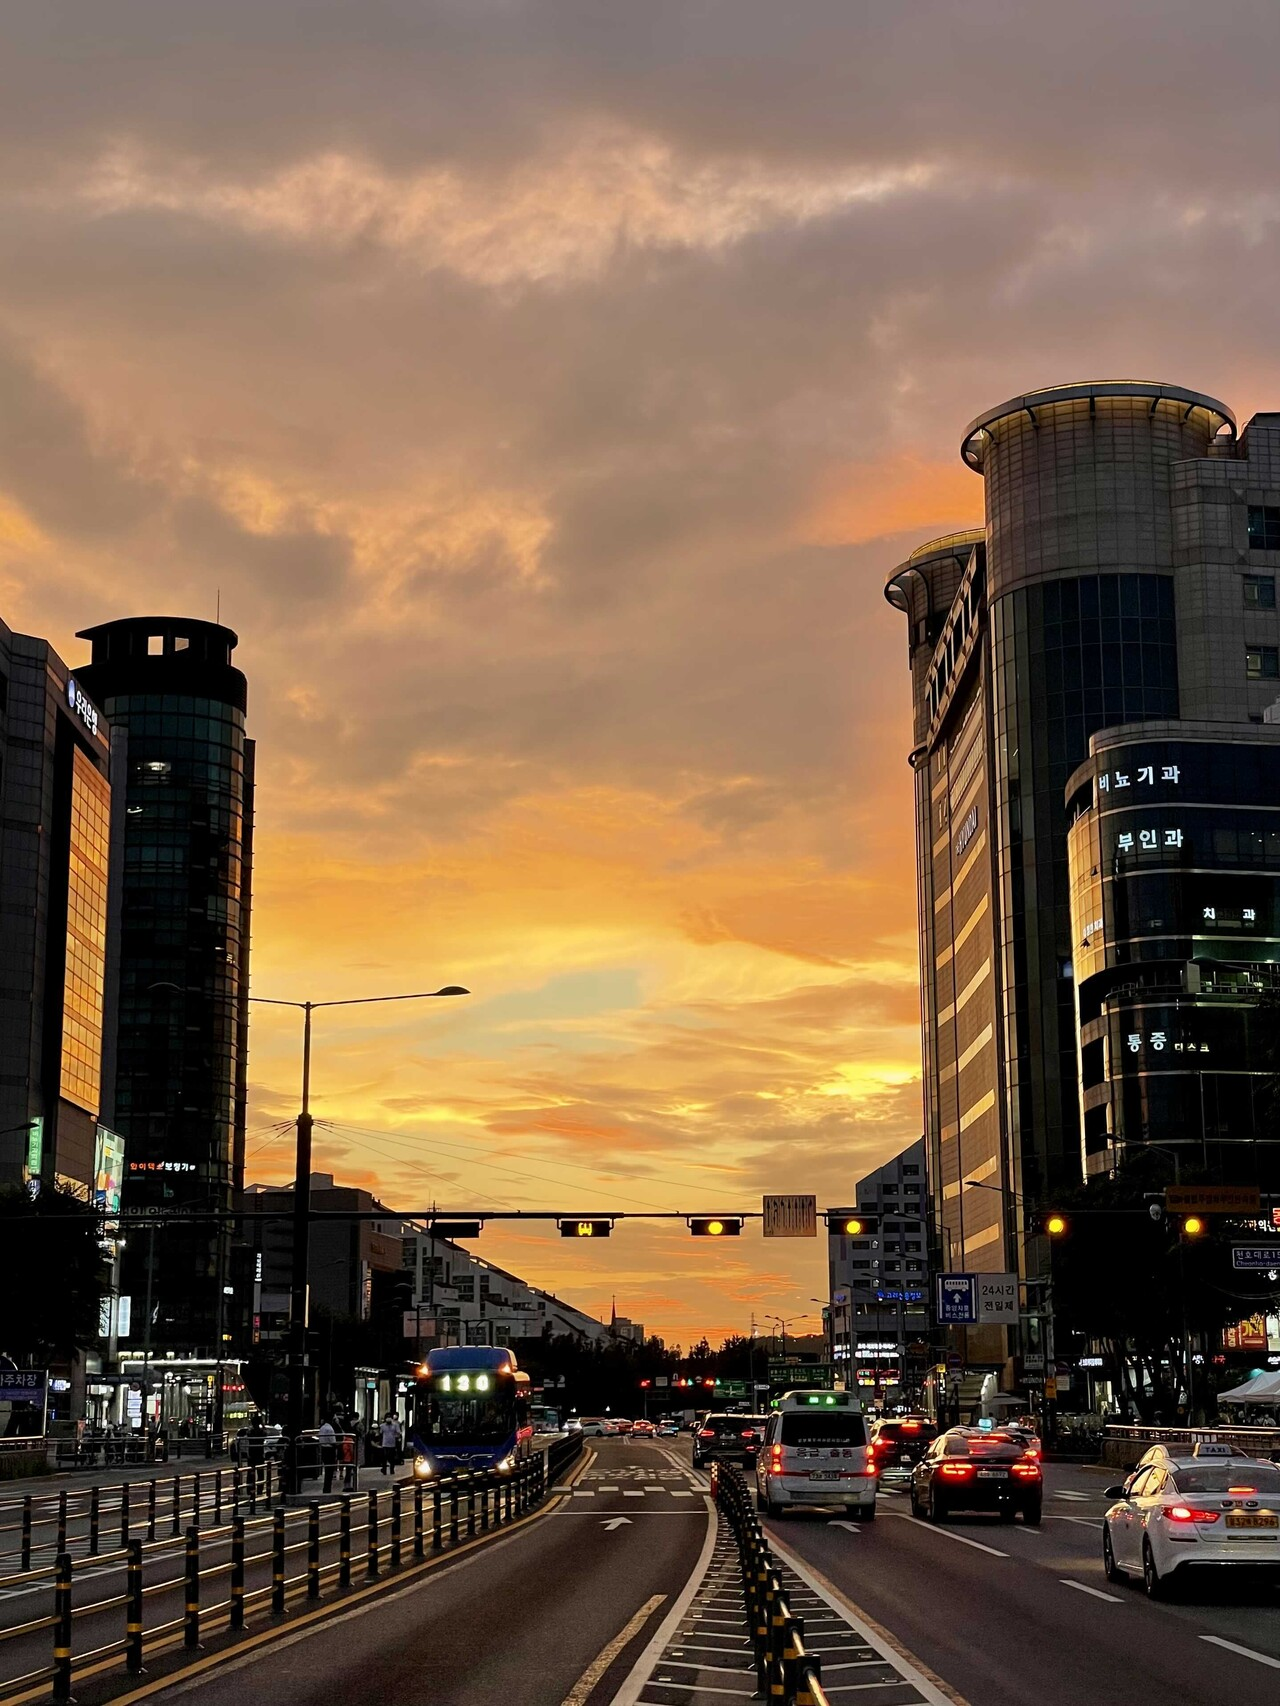



⟳ 이미지 분석중 . . .

 ✅ context : a city street with cars driving on it

 ✅ context_mood : aggressive


🎵 [추천 곡 정보]



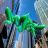

Artist 	: aespa
Title 	: Spicy
YT URL 	: https://youtube.com/watch?v=Os_heh8vPfs





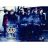

Artist 	: 틴탑
Title 	: 미치겠어
YT URL 	: https://youtube.com/watch?v=EKtxtDG2NkY





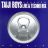

Artist 	: 서태지와 아이들
Title 	: 난 알아요
YT URL 	: https://youtube.com/watch?v=8J3m-ao43Bs





In [15]:
#@title <font face="Rage" size=6 color='#ED9149'>🚀Try it quickly on Colab!<font>

##########################################
              ## UDFs ##
##########################################

def formatter(df):
  for col in range(len(df)):
    db_series = df[col]
    url2img(db_series["image_url"][0])
    print(f'Artist \t: {db_series["artist"][0]}')
    print(f'Title \t: {db_series["title"][0]}')
    print(f'YT URL \t: {db_series["youtube_top_url"][0]}')
    print("\n\n")



def url2img(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  display(img)


def playlist_recom(mood:str, DB_path:str='/content/DataBase/DB.csv', num_of_music:int=3, music_type:str=None)->list:
  """
  무드에 맞는 플레이 리스트를 추천하는 함수
  """
  # 무드 태그에 속하는 랜덤 음악 추천 받기
  DB = pl.read_csv(DB_path)
  recommended_DB = DB.filter(
      pl.col('mood') == mood,
      pl.col('is_downloaded') == True,
      #pl.col('class') == music_type if music_type else "*"
      pl.lit(True) if not music_type else pl.col("class") == music_type
  ).sample(
      n=num_of_music
  ).select([
   "image_url",
   "artist",
   "title",
   "youtube_top_url"
   ])
  print("\n\n🎵 [추천 곡 정보]\n")
  return recommended_DB


def music_recom(mood:str, DB_path:str='/content/DataBase/DB.csv', music_type:str=None)->str:
  """
  무드에 맞는 음악을 추천하는 함수
  """
  # 무드 태그에 속하는 랜덤 음악 추천 받기
  DB = pl.read_csv(DB_path)
  recommended_DB = DB.filter(
      pl.col('mood') == mood,
      pl.col('is_downloaded') == True,
      #pl.col('class') == music_type if music_type else "*"
      pl.lit(True) if not music_type else pl.col("class") == music_type
  ).sample(
      n=1
  ).select([
   "image_url",
   "artist",
   "title",
   "youtube_top_url"
   ])
  print("\n\n🎵 [추천 곡 정보]\n")
  return recommended_DB


##########################################

import sys
sys.path.append("/content/moodsic_utils")

from IPython.display import clear_output
from time import sleep
from PIL import Image
import polars as pl
from MOOD_READER import mood_reader_bert, mood_reader_llm
from CONTEXT_READER import context_reader
import requests
from io import BytesIO

#@markdown <font face="Rage" size=4 color='#ED9149'>1. 이미지의 주소 입력<font>
image_url = 'https://d2u3dcdbebyaiu.cloudfront.net/uploads/atch_img/886/3cbd102120c663e7c74e26db5dbd1fb0_res.jpeg' #@param {type: "string"}


#@markdown <font face="Rage" size=4 color='#ED9149'>2. 추천 타입 입력<font>
recommend_type = "playlist" #@param ["playlist", "singe_music"]


#@markdown <font face="Rage" size=4 color='#ED9149'>3. 추천 받을 음악 수<font>

#@markdown **sngle_music일 경우 무시**
num_of_music = 3 #@param {type:"slider", min:3, max:30, step:1}


#@markdown <font face="Rage" size=4 color='#ED9149'>4. 무드 모델 선택<font>
mood_model = "BERT" #@param ["LLM-Agent", "BERT"]


#@markdown <font face="Rage" size=4 color='#ED9149'>5. 추천 받을 음악 종류<font>
music_class = 'kpop' #@param ["kpop", "pop", "both"]
if music_class == "both":
  music_class = None

!wget {image_url} -O image.png
clear_output()

sleep(0.3)
print("🟢 Image downloaded !")
img = Image.open("image.png")
display(img)

context = context_reader(img)

if mood_model == "LLM-Agent":
  print("\n\n⟳ 이미지 분석중 . . .")
  context_mood = mood_reader_llm(context, show_blackbox=False, only_mood=True)
elif mood_model == "BERT":
  print("\n\n⟳ 이미지 분석중 . . .")
  context_mood = mood_reader_bert(context)

print(f"\n ✅ context : {context}")
print(f"\n ✅ context_mood : {context_mood}")


if recommend_type == "playlist":
  recom_db = playlist_recom(context_mood, num_of_music=num_of_music, music_type=music_class)
  formatter(recom_db)
elif recommend_type == "singe_music":
  recom_db = music_recom(context_mood, music_type=music_class)
  formatter(recom_db)

> Abou Project

Project Page : [Github](https://github.com/kangmg/image2music)

In [16]:
# test 이미지
"""
https://png.pngtree.com/thumb_back/fw800/background/20240205/pngtree-wood-landscape-in-sibire-in-the-spring-photo-image_3052235.jpg
https://cdn.crowdpic.net/detail-thumb/thumb_d_262805FDB73BD5FEFF51E3E3D3C1D71E.jpg
https://t2.daumcdn.net/thumb/R720x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/guest/image/bCFDQk2XkyMAvjBxlZEbZVgIGbk.jpg
https://i.pinimg.com/originals/0b/0c/8d/0b0c8d4c29550a1e446a009b885b376a.jpg
https://d2u3dcdbebyaiu.cloudfront.net/uploads/atch_img/886/3cbd102120c663e7c74e26db5dbd1fb0_res.jpeg
"""

'\nhttps://png.pngtree.com/thumb_back/fw800/background/20240205/pngtree-wood-landscape-in-sibire-in-the-spring-photo-image_3052235.jpg\nhttps://cdn.crowdpic.net/detail-thumb/thumb_d_262805FDB73BD5FEFF51E3E3D3C1D71E.jpg\nhttps://t2.daumcdn.net/thumb/R720x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/guest/image/bCFDQk2XkyMAvjBxlZEbZVgIGbk.jpg\nhttps://i.pinimg.com/originals/0b/0c/8d/0b0c8d4c29550a1e446a009b885b376a.jpg\nhttps://d2u3dcdbebyaiu.cloudfront.net/uploads/atch_img/886/3cbd102120c663e7c74e26db5dbd1fb0_res.jpeg\n'